In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df_colors = pd.read_csv('painting_colors.csv')
df_elements = pd.read_csv('elements-by-episode.csv')

In [4]:
df_colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
episode             403 non-null object
alizarin_crimson    403 non-null int64
bright_red          403 non-null int64
cadmium_yellow      403 non-null int64
phthalo_green       403 non-null int64
prussian_blue       403 non-null int64
sap_green           403 non-null int64
titanium_white      403 non-null int64
van_dyke_brown      403 non-null int64
black_gesso         403 non-null int64
burnt_umber         403 non-null int64
indian_yellow       403 non-null int64
phthalo_blue        403 non-null int64
yellow_ochre        403 non-null int64
liquid_black        403 non-null int64
midnight_black      403 non-null int64
liquid_clear        403 non-null int64
dark_sienna         403 non-null int64
indian_red          403 non-null int64
dtypes: int64(18), object(1)
memory usage: 59.9+ KB


In [14]:
df_colors.mean().sort_values(ascending=False)

titanium_white      0.992556
alizarin_crimson    0.942928
van_dyke_brown      0.920596
cadmium_yellow      0.858561
yellow_ochre        0.811414
phthalo_blue        0.801489
bright_red          0.796526
midnight_black      0.786600
sap_green           0.759305
indian_yellow       0.724566
dark_sienna         0.719603
prussian_blue       0.652605
phthalo_green       0.287841
black_gesso         0.250620
burnt_umber         0.136476
liquid_clear        0.126551
liquid_black        0.034739
indian_red          0.002481
dtype: float64

This gives us an idea as to the frequency of use for Bob's colors.

In [16]:
#sorted counts, but drop the episode col.
df_colors.sum()[1:].sort_values(ascending=False)

titanium_white      400
alizarin_crimson    380
van_dyke_brown      371
cadmium_yellow      346
yellow_ochre        327
phthalo_blue        323
bright_red          321
midnight_black      317
sap_green           306
indian_yellow       292
dark_sienna         290
prussian_blue       263
phthalo_green       116
black_gesso         101
burnt_umber          55
liquid_clear         51
liquid_black         14
indian_red            1
dtype: object

Here's the same frequency, but as a number of times each was used in his 403 paintings.

In [17]:
df_colors['total_colors'] = df_colors.sum(axis=1)

In [23]:
df_colors.total_colors.describe()

count    403.000000
mean      10.605459
std        2.378525
min        1.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       15.000000
Name: total_colors, dtype: float64

In [24]:
df_colors[df_colors.total_colors == 15]

,episode,alizarin_crimson,bright_red,cadmium_yellow,phthalo_green,prussian_blue,sap_green,titanium_white,van_dyke_brown,black_gesso,burnt_umber,indian_yellow,phthalo_blue,yellow_ochre,liquid_black,midnight_black,liquid_clear,dark_sienna,indian_red,total_colors
214,S17E07,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,15
293,S23E08,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,15
306,S24E08,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,15
328,S26E04,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,15
339,S27E02,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,15
341,S27E03,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,15


In [33]:
df_colors[df_colors.total_colors == 1]

,episode,alizarin_crimson,bright_red,cadmium_yellow,phthalo_green,prussian_blue,sap_green,titanium_white,van_dyke_brown,black_gesso,burnt_umber,indian_yellow,phthalo_blue,yellow_ochre,liquid_black,midnight_black,liquid_clear,dark_sienna,indian_red,total_colors
200,S16E06,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [34]:
df_colors[df_colors.total_colors >= 10.6].count()

episode             254
alizarin_crimson    254
bright_red          254
cadmium_yellow      254
phthalo_green       254
prussian_blue       254
sap_green           254
titanium_white      254
van_dyke_brown      254
black_gesso         254
burnt_umber         254
indian_yellow       254
phthalo_blue        254
yellow_ochre        254
liquid_black        254
midnight_black      254
liquid_clear        254
dark_sienna         254
indian_red          254
total_colors        254
dtype: int64

In [43]:
df_colors.total_colors.mode()

0    12
dtype: int64

In [58]:
df_colors.total_colors.value_counts().sort_index()

1       1
3       4
4       4
5       5
6      11
7      25
8      26
9      29
10     44
11     78
12    100
13     58
14     12
15      6
Name: total_colors, dtype: int64

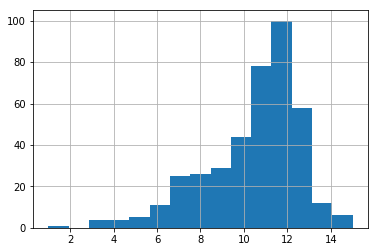

In [57]:
df_colors.total_colors.hist(bins=15)

The average painting used about 10.6 colors. He did at least 6 paintings with 15 different colors, and one with only 1 color. We need to keep in mind that he did have guest painters on from time to time. The painting with only 1 color is an example of this. Also, the paintings with 15 colors are mainly from later season/episodes. He apparently decided to branch out over time to new colors. 254 of his paintings used more than the average (10.6). By far, the most common number of colors used was 12.